As with previous stages, I will be analyzing the state of New York and I will use linear and non-linear regression model for it. I will also compare trends for the 5 counties that have the most number of cases.

C:\Users\Owner\AppData\Local\Temp\ipykernel_85548\3734565435.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_york['total_cases'] = df_new_york[case_columns].iloc[:, -1]
C:\Users\Owner\AppData\Local\Temp\ipykernel_85548\3734565435.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_york['total_deaths'] = df_new_york[death_columns].iloc[:, -1]


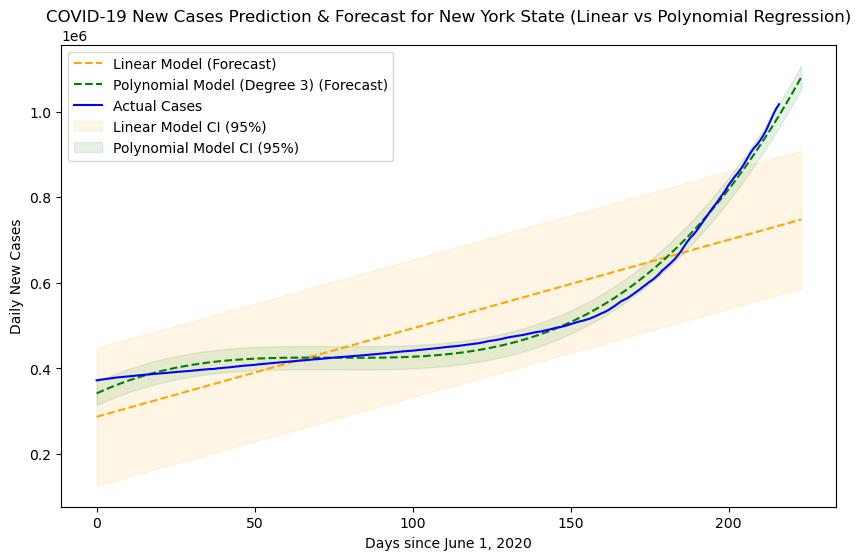

Linear RMSE (Cases): 82191.13
Polynomial RMSE (Cases): 13894.69


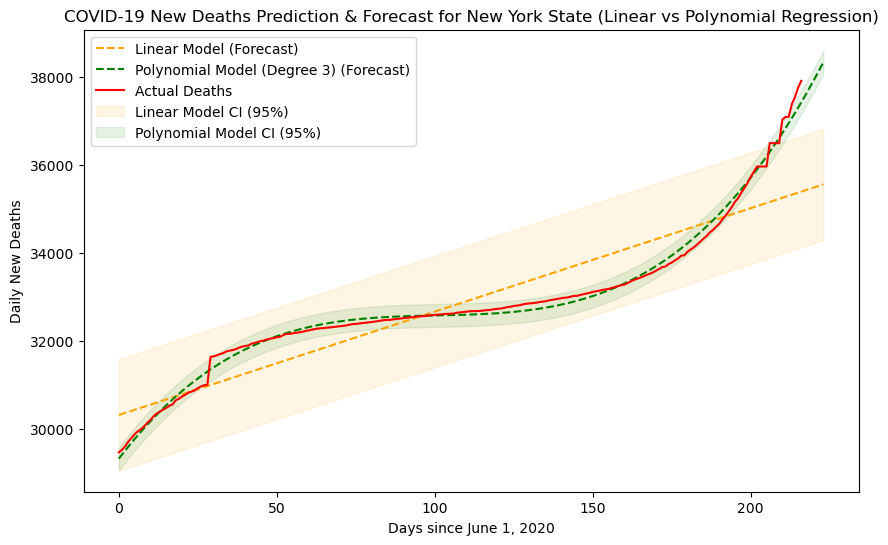

Linear RMSE (Deaths): 646.07
Polynomial RMSE (Deaths): 132.16 

Top 5 counties in New York: 
          County Name  total_cases  total_deaths
1868   Queens County        127743          7573
1851    Kings County        125655          7771
1879  Suffolk County        101233          2341
1857   Nassau County         92035          2420
1830    Bronx County         85646          5147


In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

df_united_states = pd.read_csv('US-Covid.csv')
df_new_york = df_united_states[df_united_states['State'] == 'NY']

case_columns = [col for col in df_new_york.columns if '_cases' in col]
death_columns = [col for col in df_new_york.columns if '_deaths' in col]

# Calculate the total cumulative number of cases and deaths for each county
df_new_york['total_cases'] = df_new_york[case_columns].iloc[:, -1]
df_new_york['total_deaths'] = df_new_york[death_columns].iloc[:, -1]

df_new_york.to_csv('df_new_york_with_total_cases_and_deaths.csv', index=False)

# --- Do the linear and polynomial RMSE for New York ---

# Sum daily cases and deaths across all counties to get state-level data
state_cases = df_new_york[case_columns].sum()
state_deaths = df_new_york[death_columns].sum()

# Convert to numpy arrays for plotting and analysis
X = np.array(range(len(case_columns))).reshape(-1, 1)  # Days since start
y_cases = state_cases.values
y_deaths = state_deaths.values

# Linear Regression Model for Cases
linear_model_cases = LinearRegression()
linear_model_cases.fit(X, y_cases)
y_linear_pred_cases = linear_model_cases.predict(X)
linear_rmse_cases = np.sqrt(mean_squared_error(y_cases, y_linear_pred_cases))

# Polynomial Regression Model (degree 3) for Cases
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)
poly_model_cases = LinearRegression()
poly_model_cases.fit(X_poly, y_cases)
y_poly_pred_cases = poly_model_cases.predict(X_poly)
poly_rmse_cases = np.sqrt(mean_squared_error(y_cases, y_poly_pred_cases))

# Linear Regression Model for Deaths
linear_model_deaths = LinearRegression()
linear_model_deaths.fit(X, y_deaths)
y_linear_pred_deaths = linear_model_deaths.predict(X)
linear_rmse_deaths = np.sqrt(mean_squared_error(y_deaths, y_linear_pred_deaths))

# Polynomial Regression Model (degree 3) for Deaths
poly_model_deaths = LinearRegression()
poly_model_deaths.fit(X_poly, y_deaths)
y_poly_pred_deaths = poly_model_deaths.predict(X_poly)
poly_rmse_deaths = np.sqrt(mean_squared_error(y_deaths, y_poly_pred_deaths))

future_days = 7
X_future = np.array(range(len(case_columns) + future_days)).reshape(-1, 1)

# Predict future cases using the linear model
y_linear_future_cases = linear_model_cases.predict(X_future)

# Predict future cases using the polynomial model
X_future_poly = poly_features.fit_transform(X_future)
y_poly_future_cases = poly_model_cases.predict(X_future_poly)

# Plotting the forecast results for Cases
plt.figure(figsize=(10, 6))
plt.plot(X_future, y_linear_future_cases, color='orange', linestyle='--', label='Linear Model (Forecast)')
plt.plot(X_future, y_poly_future_cases, color='green', linestyle='--', label='Polynomial Model (Degree 3) (Forecast)')
plt.plot(X, y_cases, color='blue', label='Actual Cases')

# Calculate confidence interval for linear model (95% confidence)
y_linear_std_error = np.std(y_cases - y_linear_pred_cases)
ci = 1.96 * y_linear_std_error  # 95% confidence interval
plt.fill_between(X_future.flatten(), (y_linear_future_cases - ci), (y_linear_future_cases + ci), color='orange', alpha=0.1, label='Linear Model CI (95%)')

# Calculate confidence interval for polynomial model (95% confidence)
y_poly_std_error = np.std(y_cases - y_poly_pred_cases)
ci_poly = 1.96 * y_poly_std_error  # 95% confidence interval
plt.fill_between(X_future.flatten(), (y_poly_future_cases - ci_poly), (y_poly_future_cases + ci_poly), color='green', alpha=0.1, label='Polynomial Model CI (95%)')

plt.xlabel('Days since June 1, 2020')
plt.ylabel('Daily New Cases')
plt.title('COVID-19 New Cases Prediction & Forecast for New York State (Linear vs Polynomial Regression)')
plt.legend()
plt.show()

print(f'Linear RMSE (Cases): {linear_rmse_cases:.2f}')
print(f'Polynomial RMSE (Cases): {poly_rmse_cases:.2f}')

# Predict future deaths using the linear model
y_linear_future_deaths = linear_model_deaths.predict(X_future)

# Predict future deaths using the polynomial model
y_poly_future_deaths = poly_model_deaths.predict(X_future_poly)

# Plotting the forecast results for Deaths
plt.figure(figsize=(10, 6))
plt.plot(X_future, y_linear_future_deaths, color='orange', linestyle='--', label='Linear Model (Forecast)')
plt.plot(X_future, y_poly_future_deaths, color='green', linestyle='--', label='Polynomial Model (Degree 3) (Forecast)')
plt.plot(X, y_deaths, color='red', label='Actual Deaths')

# Calculate confidence interval for linear model (95% confidence)
y_linear_std_error_deaths = np.std(y_deaths - y_linear_pred_deaths)
ci_deaths = 1.96 * y_linear_std_error_deaths  # 95% confidence interval
plt.fill_between(X_future.flatten(), (y_linear_future_deaths - ci_deaths), (y_linear_future_deaths + ci_deaths), color='orange', alpha=0.1, label='Linear Model CI (95%)')

# Calculate confidence interval for polynomial model (95% confidence)
y_poly_std_error_deaths = np.std(y_deaths - y_poly_pred_deaths)
ci_poly_deaths = 1.96 * y_poly_std_error_deaths  # 95% confidence interval
plt.fill_between(X_future.flatten(), (y_poly_future_deaths - ci_poly_deaths), (y_poly_future_deaths + ci_poly_deaths), color='green', alpha=0.1, label='Polynomial Model CI (95%)')

plt.xlabel('Days since June 1, 2020')
plt.ylabel('Daily New Deaths')
plt.title('COVID-19 New Deaths Prediction & Forecast for New York State (Linear vs Polynomial Regression)')
plt.legend()
plt.show()

print(f'Linear RMSE (Deaths): {linear_rmse_deaths:.2f}')
print(f'Polynomial RMSE (Deaths): {poly_rmse_deaths:.2f} \n')

# --- Continue with the rest ---

# Sort the DataFrame by total cases in descending order and select the top 5 counties
top_5_counties = df_new_york.sort_values(by='total_cases', ascending=False).head(5)

#Show New York's top 5 counties (i.e. highest number of cases)
print("Top 5 counties in New York: ")
print(top_5_counties[['County Name', 'total_cases', 'total_deaths']])

As you can see, the top 5 counties with the highest number of cases in New York were Queens, Kings, Suffolk, Nassau, and Bronx. The next cell will show linear and polynomial RSME plots for these counties so taht they can be compared to the entire state.

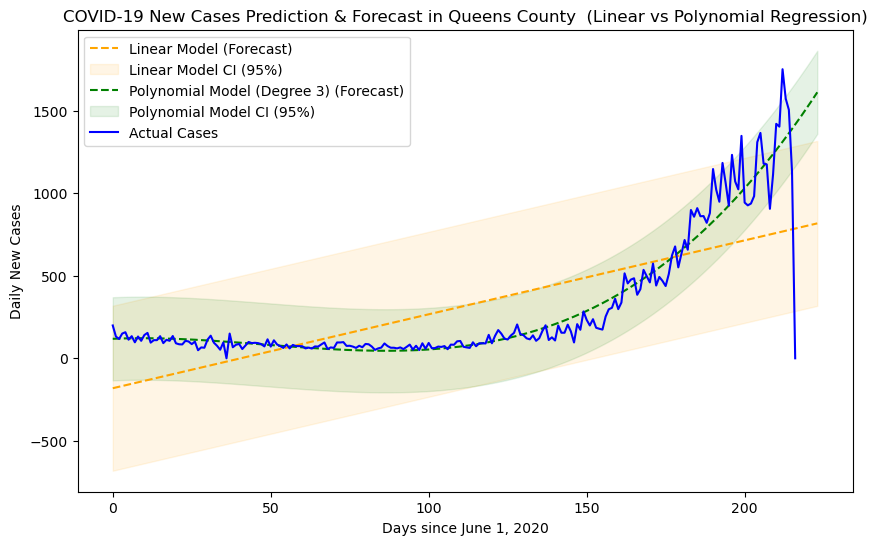

Linear RMSE for Cases in Queens County : 255.11
Polynomial RMSE for Cases in Queens County : 128.54


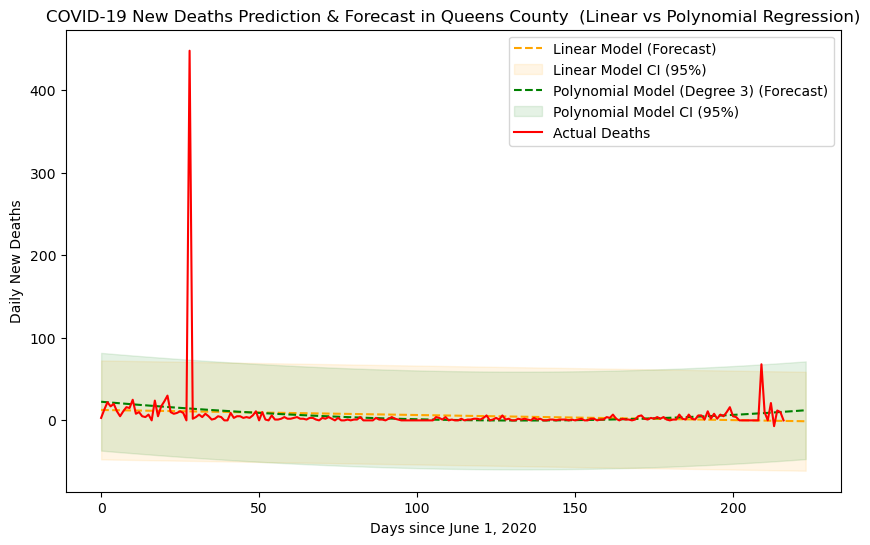

Linear RMSE for Deaths in Queens County : 30.59
Polynomial RMSE for Deaths in Queens County : 30.21


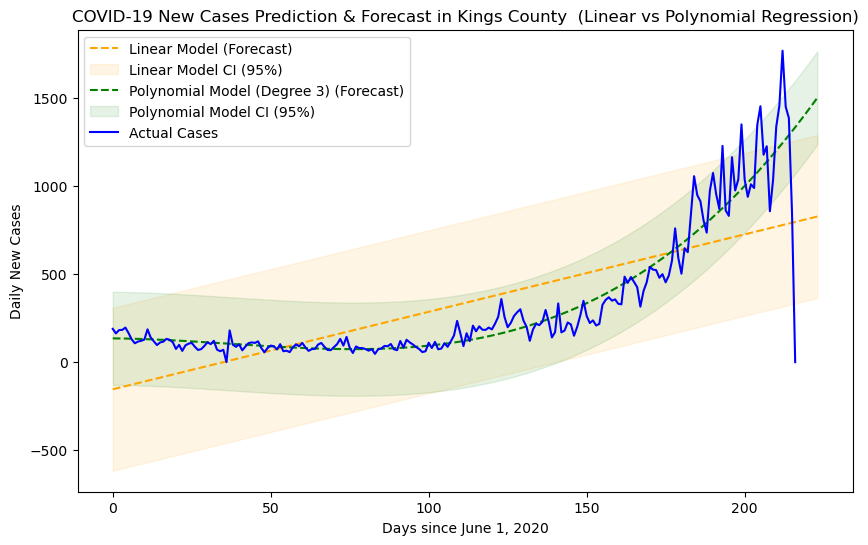

Linear RMSE for Cases in Kings County : 235.81
Polynomial RMSE for Cases in Kings County : 134.91


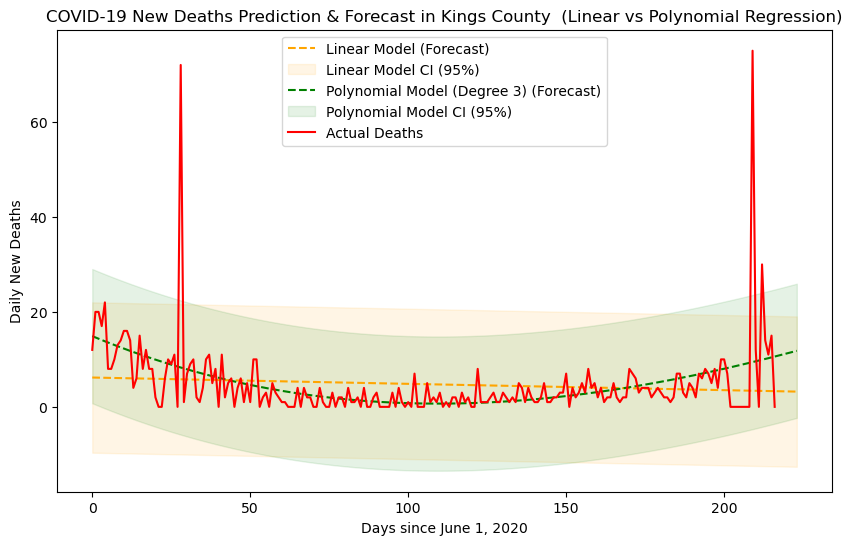

Linear RMSE for Deaths in Kings County : 8.08
Polynomial RMSE for Deaths in Kings County : 7.21


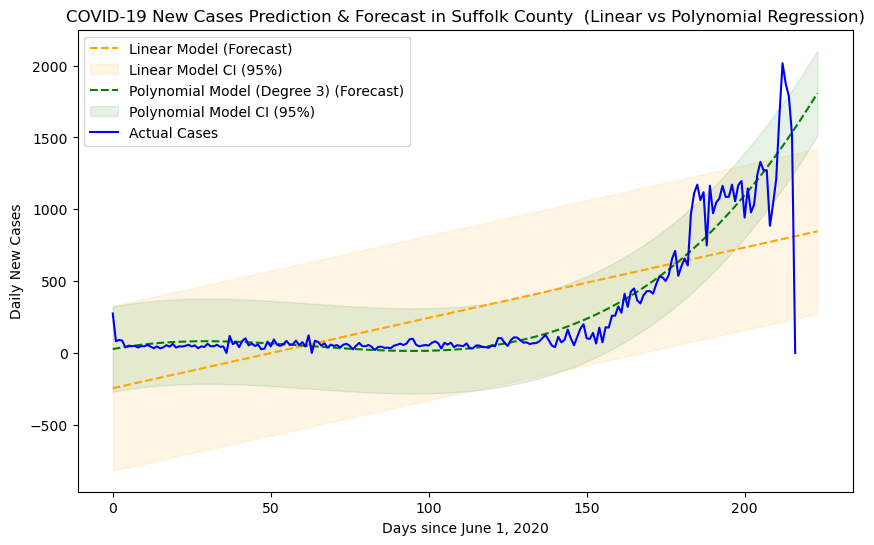

Linear RMSE for Cases in Suffolk County : 292.94
Polynomial RMSE for Cases in Suffolk County : 151.24


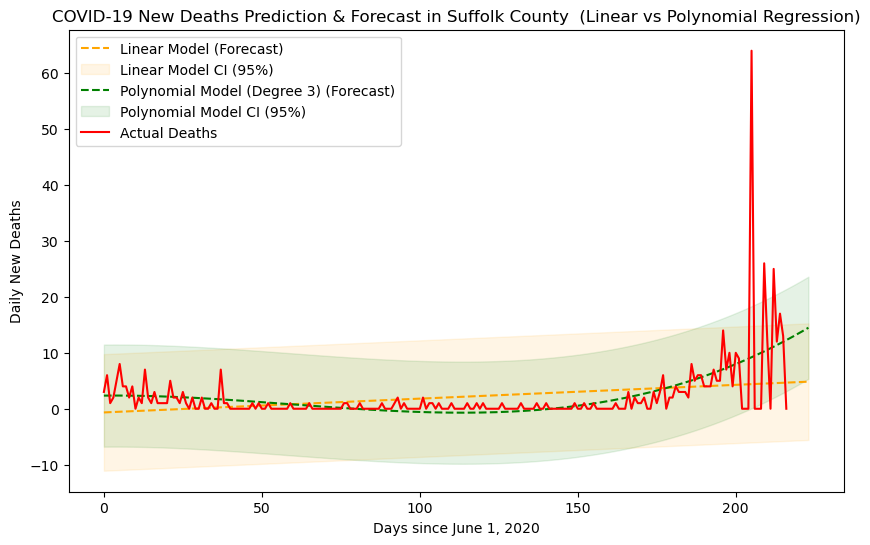

Linear RMSE for Deaths in Suffolk County : 5.32
Polynomial RMSE for Deaths in Suffolk County : 4.66


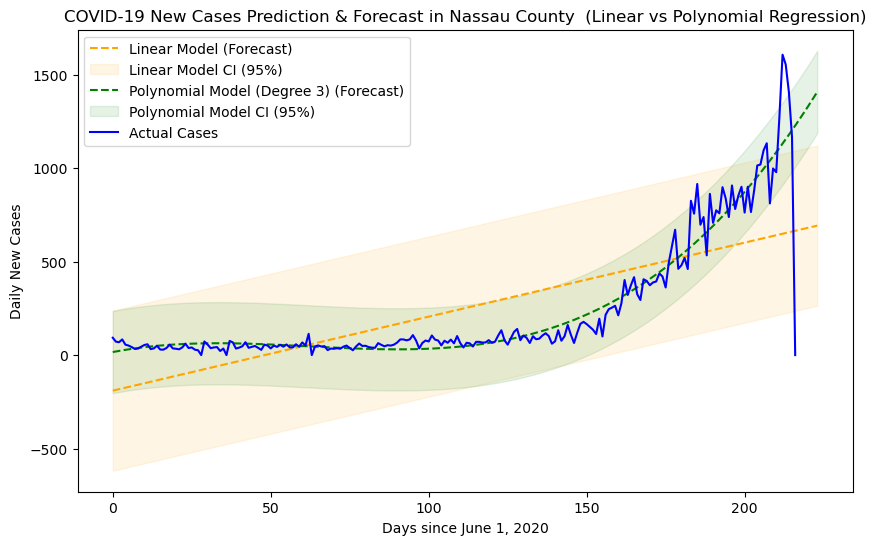

Linear RMSE for Cases in Nassau County : 218.67
Polynomial RMSE for Cases in Nassau County : 112.32


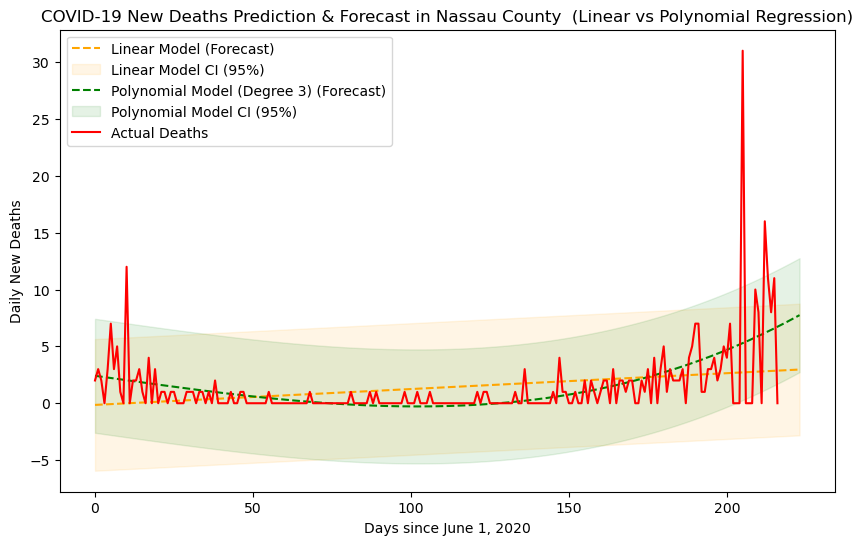

Linear RMSE for Deaths in Nassau County : 2.95
Polynomial RMSE for Deaths in Nassau County : 2.56


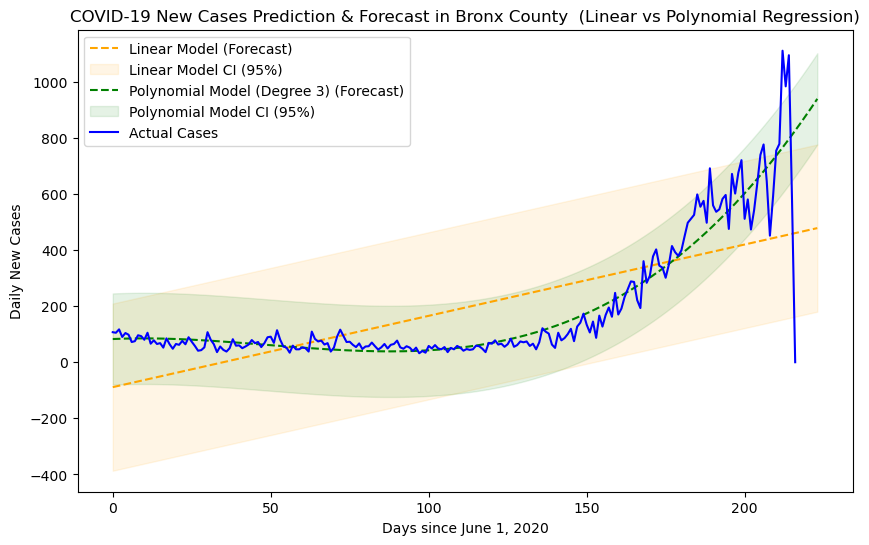

Linear RMSE for Cases in Bronx County : 151.97
Polynomial RMSE for Cases in Bronx County : 82.92


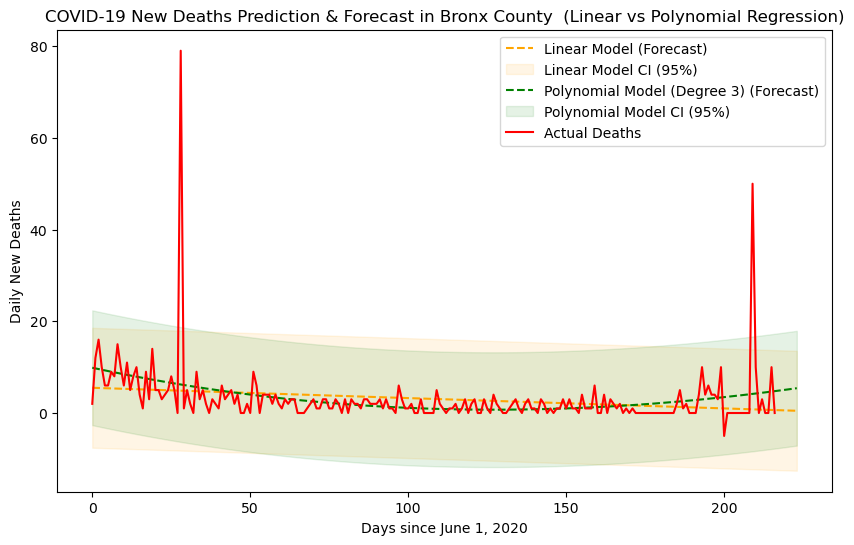

Linear RMSE for Deaths in Bronx County : 6.67
Polynomial RMSE for Deaths in Bronx County : 6.38


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

new_york = pd.read_csv('df_new_york_with_total_cases_and_deaths.csv')

# Get top 5 counties by total cases
top_counties = new_york.nlargest(5, 'total_cases')['County Name'].tolist()

# Filter the dataset for the top 5 counties
df_top_counties = new_york[new_york['County Name'].isin(top_counties)]

# Get the list of dates for analysis
case_columns = [col for col in df_top_counties.columns if '_cases' in col]
death_columns = [col for col in df_top_counties.columns if '_deaths' in col]

# Iterate over each top county to perform RMSE analysis
for county in top_counties:
    # Filter data for the current county
    county_data = df_top_counties[df_top_counties['County Name'] == county]
    
    # Get the number of new cases for each day
    X = np.array(range(len(case_columns) - 1)).reshape(-1, 1)  # Adjusted to match the length after np.diff
    y_cases = np.diff(county_data[case_columns].values.flatten())

    # Linear Regression Model for Cases
    linear_model_cases = LinearRegression()
    linear_model_cases.fit(X, y_cases)
    y_linear_pred_cases = linear_model_cases.predict(X)
    linear_rmse_cases = np.sqrt(mean_squared_error(y_cases, y_linear_pred_cases))

    # Polynomial Regression Model (degree 3) for Cases
    poly_features_cases = PolynomialFeatures(degree=3)
    X_poly_cases = poly_features_cases.fit_transform(X)
    poly_model_cases = LinearRegression()
    poly_model_cases.fit(X_poly_cases, y_cases)
    y_poly_pred_cases = poly_model_cases.predict(X_poly_cases)
    poly_rmse_cases = np.sqrt(mean_squared_error(y_cases, y_poly_pred_cases))

    # Get the number of new deaths for each day
    y_deaths = np.diff(county_data[death_columns].values.flatten())

    # Linear Regression Model for Deaths
    linear_model_deaths = LinearRegression()
    linear_model_deaths.fit(X, y_deaths)
    y_linear_pred_deaths = linear_model_deaths.predict(X)
    linear_rmse_deaths = np.sqrt(mean_squared_error(y_deaths, y_linear_pred_deaths))

    # Polynomial Regression Model (degree 3) for Deaths
    poly_features_deaths = PolynomialFeatures(degree=3)
    X_poly_deaths = poly_features_deaths.fit_transform(X)
    poly_model_deaths = LinearRegression()
    poly_model_deaths.fit(X_poly_deaths, y_deaths)
    y_poly_pred_deaths = poly_model_deaths.predict(X_poly_deaths)
    poly_rmse_deaths = np.sqrt(mean_squared_error(y_deaths, y_poly_pred_deaths))

    # Forecast for the next 7 days for Cases and Deaths
    future_days = 7
    X_future = np.array(range(len(case_columns) - 1 + future_days)).reshape(-1, 1)

    # Predict future cases using linear and polynomial models
    y_linear_future_cases = linear_model_cases.predict(X_future)
    X_future_poly_cases = poly_features_cases.transform(X_future)
    y_poly_future_cases = poly_model_cases.predict(X_future_poly_cases)

    # Predict future deaths using linear and polynomial models
    y_linear_future_deaths = linear_model_deaths.predict(X_future)
    X_future_poly_deaths = poly_features_deaths.transform(X_future)
    y_poly_future_deaths = poly_model_deaths.predict(X_future_poly_deaths)

    # Calculate confidence intervals for the predictions (95% CI)
    def get_confidence_interval(y_true, y_pred):
        residuals = y_true - y_pred
        std_error = np.std(residuals)
        ci = 1.96 * std_error
        return ci

    ci_cases_linear = get_confidence_interval(y_cases, y_linear_pred_cases)
    ci_cases_poly = get_confidence_interval(y_cases, y_poly_pred_cases)
    ci_deaths_linear = get_confidence_interval(y_deaths, y_linear_pred_deaths)
    ci_deaths_poly = get_confidence_interval(y_deaths, y_poly_pred_deaths)

    # Plotting the forecast results for Cases
    plt.figure(figsize=(10, 6))
    plt.plot(X_future, y_linear_future_cases, color='orange', linestyle='--', label='Linear Model (Forecast)')
    plt.fill_between(X_future.flatten(), y_linear_future_cases - ci_cases_linear, y_linear_future_cases + ci_cases_linear, color='orange', alpha=0.1, label='Linear Model CI (95%)')
    plt.plot(X_future, y_poly_future_cases, color='green', linestyle='--', label='Polynomial Model (Degree 3) (Forecast)')
    plt.fill_between(X_future.flatten(), y_poly_future_cases - ci_cases_poly, y_poly_future_cases + ci_cases_poly, color='green', alpha=0.1, label='Polynomial Model CI (95%)')
    plt.plot(X, y_cases, color='blue', label='Actual Cases')
    plt.xlabel('Days since June 1, 2020')
    plt.ylabel('Daily New Cases')
    plt.title(f'COVID-19 New Cases Prediction & Forecast in {county} (Linear vs Polynomial Regression)')
    plt.legend()
    plt.show()

    print(f"Linear RMSE for Cases in {county}: {linear_rmse_cases:.2f}")
    print(f"Polynomial RMSE for Cases in {county}: {poly_rmse_cases:.2f}")

    # Plotting the forecast results for Deaths
    plt.figure(figsize=(10, 6))
    plt.plot(X_future, y_linear_future_deaths, color='orange', linestyle='--', label='Linear Model (Forecast)')
    plt.fill_between(X_future.flatten(), y_linear_future_deaths - ci_deaths_linear, y_linear_future_deaths + ci_deaths_linear, color='orange', alpha=0.1, label='Linear Model CI (95%)')
    plt.plot(X_future, y_poly_future_deaths, color='green', linestyle='--', label='Polynomial Model (Degree 3) (Forecast)')
    plt.fill_between(X_future.flatten(), y_poly_future_deaths - ci_deaths_poly, y_poly_future_deaths + ci_deaths_poly, color='green', alpha=0.1, label='Polynomial Model CI (95%)')
    plt.plot(X, y_deaths, color='red', label='Actual Deaths')
    plt.xlabel('Days since June 1, 2020')
    plt.ylabel('Daily New Deaths')
    plt.title(f'COVID-19 New Deaths Prediction & Forecast in {county} (Linear vs Polynomial Regression)')
    plt.legend()
    plt.show()

    print(f"Linear RMSE for Deaths in {county}: {linear_rmse_deaths:.2f}")
    print(f"Polynomial RMSE for Deaths in {county}: {poly_rmse_deaths:.2f}")


<h3>Analyzing the trends for New York's top 5 counties</h3>

Queens:

As seen with the United States and the other countries we compared to the United States, the polynomial model better captures and predicts the trends of Queens county. With a number of 128.54, the poluynomial model with its low boas and high variance is the best one for Queens county if I had to choose one. The polynomial also seems to approximate surges in case numbers more acccurately. 

Kings:

As with Queens, the linear model for Kings shows a consistent trend upwards, but it underestimes the the peaks in new cases, which is an indication of high bias. The polynomial model with a number of 134.91 is lower the the linear's 235.81, which suggests that it it better suited for Kings. The polynomial model with its low bias captures the trends in number of cases more accurately.

Suffolk:

As with Queens and Kings, the polynomial model is a better fit for Suffolk with a lower RMSE value of 151.24 compared to 292.94 for the linear model. However, the values are higher than the other 2 counties, which suggests that the models found it more challenging to predict trends in Suffolk. This could be due to public health responses and the population's actions during the 6 month period. 

Nassau:

Just like the 3 previous counties discussed, the polynomial model is the best choice for captuing and predicting the trends in Nassau. The polynomial model has an RMSE number of 112.32 compared to the linear's 218.67.


Bronx:

Once again, the polynomial model is the best one suited for capturing the trends in covid cases. Bronx county has a polynomial RMSE of 82.92 compared to the linear's 151.97. 


Across all five counties—Queens, Kings, Suffolk, Nassau, and Bronx—the polynomial model consistently outperforms the linear model in predicting the trends of COVID-19 new cases. The lower RMSE values for the polynomial model indicate its ability to handle the complexities and fluctuations in new cases better than the linear model, which is limited by its high bias and tendency to underpredict surges. The key takeaway is that a more flexible model, like the polynomial regression, is crucial for accurately modeling the spread of infectious diseases, especially during periods of rapid growth or decline.



<h3>Hypothesis Tests on stage III questions </h3>

My 3 enrichment variables from stage 3 are:

Annual Average Employment <br>
Annual Total Wages <br>
Population <br>

Questions from stage 3:

1. Areas that have a high number of blue-collar jobs and industries have a higher number of COVID-19 cases compared to places with more white-collar jobs.

2. Areas with higher wages tend to have a lower number of COVID-19 cases compared to areas of lower wages.

3. Areas that have are more densely populated tend to have a higher number of cases compared to areas with sparse populations due to more people in close proximity to each other.

<h4>1st Hypothesis question: </h4>

"Areas that have a high number of blue-collar jobs and industries have a higher number of COVID-19 cases compared to places with more white-collar jobs."

For this question, I performed a two sample t-test and I focused on a smaller area instead of focusing on entire states like I did for the correlation in stage 3. I foucsed on New York and I conducted the tests on the top 5 blue collar and top 5 white collar counties.

Null hypothesis (H₀): There is no significant difference in the average number of COVID-19 cases between blue-collar and white-collar counties.

Alternative Hypothesis (H₁): The average number of COVID-19 cases is significantly different between blue-collar and white-collar counties, and blue-collar counties have more cases on average.

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

df_new_york_employment_data = pd.read_csv('df_new_york_employment_data.csv')

# Define blue-collar and white-collar industries based on industry names
blue_collar_industries = [
    '101 Goods-producing',
    '1011 Natural resources and mining',
    '1012 Construction',
    '1013 Manufacturing',
    '1021 Trade, transportation, and utilities'
]

white_collar_industries = [
    '1022 Information',
    '1023 Financial activities',
    '1024 Professional and business services',
    '1025 Education and health services'
]

# Add a column for blue-collar and white-collar classification
df_new_york_employment_data['is_blue_collar'] = df_new_york_employment_data['Industry'].isin(blue_collar_industries)
df_new_york_employment_data['is_white_collar'] = df_new_york_employment_data['Industry'].isin(white_collar_industries)

# Calculate the total number of blue-collar and white-collar jobs for each county
blue_collar_jobs = df_new_york_employment_data[df_new_york_employment_data['is_blue_collar']].groupby('Area')['Annual Average Employment'].sum().reset_index(name='blue_collar_jobs')
white_collar_jobs = df_new_york_employment_data[df_new_york_employment_data['is_white_collar']].groupby('Area')['Annual Average Employment'].sum().reset_index(name='white_collar_jobs')

# Merge the blue-collar and white-collar data
county_jobs = pd.merge(blue_collar_jobs, white_collar_jobs, on='Area', how='outer').fillna(0)

# Determine the dominant category for each county
county_jobs['dominant_category'] = np.where(county_jobs['blue_collar_jobs'] > county_jobs['white_collar_jobs'], 'blue_collar', 'white_collar')

# Filter out the counties for each group to prevent any overlap
blue_collar_counties = county_jobs[county_jobs['dominant_category'] == 'blue_collar'].sort_values(by='blue_collar_jobs', ascending=False).head(5)
white_collar_counties = county_jobs[county_jobs['dominant_category'] == 'white_collar'].sort_values(by='white_collar_jobs', ascending=False).head(5)

# Extract the county names
top_5_blue_collar = blue_collar_counties['Area'].tolist()
top_5_white_collar = white_collar_counties['Area'].tolist()

# Print the selected counties
print("Top 5 Blue-Collar Counties:", top_5_blue_collar)
print("Top 5 White-Collar Counties:", top_5_white_collar)

# Filter the dataframe to include only the counties we're interested in
blue_collar_data = df_new_york_employment_data[df_new_york_employment_data['Area'].isin(top_5_blue_collar)]
white_collar_data = df_new_york_employment_data[df_new_york_employment_data['Area'].isin(top_5_white_collar)]

# Filter columns to include only daily new cases from June 1, 2020 to December 31, 2020
case_columns = [col for col in df_new_york_employment_data.columns if '_cases' in col and '2020-06-01' <= col.split('_')[0] <= '2020-12-31']

# Calculate average new cases for each group
blue_collar_cases = blue_collar_data[case_columns].mean(axis=0).values
white_collar_cases = white_collar_data[case_columns].mean(axis=0).values

# two-sample t-test
t_stat, p_value = ttest_ind(blue_collar_cases, white_collar_cases, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average number of COVID-19 cases between blue-collar and white-collar counties.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average number of COVID-19 cases between blue-collar and white-collar counties.")


Top 5 Blue-Collar Counties: ['Suffolk County, New York', 'Queens County, New York', 'Erie County, New York', 'Onondaga County, New York', 'Orange County, New York']
Top 5 White-Collar Counties: ['New York County, New York', 'Kings County, New York', 'Nassau County, New York', 'Westchester County, New York', 'Monroe County, New York']
T-statistic: -10.4182
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the average number of COVID-19 cases between blue-collar and white-collar counties.


For the T-statistic, I got -10.4182. This indicates that blue-collar counties have more covid 19 cases compared to white-collar counties. So in the top 5 counties of New York, there is a significant in the average number of covid 19 cases between blue collar and white collar counties. This difference then does not occur due to random chance.

This is different from the results of my correlation analysis of this question between New York and Texas, which is surprising. This could be due to the fact that New York is dominated by white-collar industries. It could also be that white-collar industries in New York provide more opportunities for remote work compared to Texas's white collar industries. 

<h4>2nd Hypothesis question: </h4>

"Areas that have a high number of blue-collar jobs and industries have a higher number of COVID-19 cases compared to places with more white-collar jobs."

For this one, I also performed a two-sample t-test, but this time I used all of the counties in New York State. I used the median of the Annual Total Wages as a threshold to group counties as either high wage earners or low wage earners.

Null Hypothesis (H₀): There is no significant difference in the average number of COVID-19 cases between areas with higher wages and areas with lower wages.

Alternative Hypothesis (H₁): Areas with higher wages have fewer COVID-19 cases compared to areas with lower wages.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv('df_new_york_employment_data.csv')

# Calculate the total number of cases from June 1 to Dec 31 for each county
case_columns = [col for col in df.columns if '_cases' in col and '2020-06' <= col[:7] <= '2020-12']
df['total_cases'] = df[case_columns].sum(axis=1)

# Group counties by median wage
median_wage = df['Annual Total Wages'].median()
high_wage_group = df[df['Annual Total Wages'] > median_wage]
low_wage_group = df[df['Annual Total Wages'] <= median_wage]

# Calculate average number of COVID-19 cases for each group
high_wage_cases = high_wage_group['total_cases']
low_wage_cases = low_wage_group['total_cases']

# Perform the t-test (two-sample)
t_stat_2, p_value_2 = ttest_ind(high_wage_cases, low_wage_cases, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat_2:.4f}")
print(f"P-value: {p_value_2:.4f}")

if p_value_2 < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average number of COVID-19 cases between high-wage and low-wage counties.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average number of COVID-19 cases between high-wage and low-wage counties.")


T-statistic: 11.7980
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the average number of COVID-19 cases between high-wage and low-wage counties.


This time, I got a positive T-statistic of 11.7980. This indicates that on average, the number of cases in the high wage group is larger than those in the low wage group. The p-value is also close to zero in this case, so we reject the null hypothesis because their is a significant difference in the average number of cases between high wage and low wage counties.

However, the interesting result here is that my alternate hypothesis is contradicted because it turns out the on average, high wage counties have more cases than the low wage counties in New York.

<h4>3rd Hypothesis question: </h4>

"Areas that have are more densely populated tend to have a higher number of cases compared to areas with sparse populations due to more people in close proximity to each other."

To test this one out, I also use a two-sample t-test, but I use every county this time as well. I divide the counties together into 2 groups, densely populated and sparsely populated. I use the median of the population of all the counties as a threshold to group counties as either densely populated or sparsely populated.

In [4]:
import pandas as pd
from scipy.stats import ttest_ind

df_2 = pd.read_csv('df_new_york_employment_data.csv')

# Group by 'Area' (county) and take the first 'population' value for each county to avoid duplicates
df_population = df_2.groupby('Area')['population'].first().reset_index()

# Define a threshold for population to classify counties as 'densely' or 'sparsely' populated
threshold = df_population['population'].median() 

# Create two groups: densely and sparsely populated counties
dense_counties = df_population[df_population['population'] > threshold]['Area'].tolist()
sparse_counties = df_population[df_population['population'] <= threshold]['Area'].tolist()

# Filter the original dataframe to only keep June 1, 2020 - December 31, 2020 COVID-19 case columns
covid_columns = [col for col in df_2.columns if '_cases' in col and '2020-06-01' <= col <= '2020-12-31']
df_covid_filtered = df_2[['Area'] + covid_columns]

# Calculate total COVID-19 cases per county for the period
df_covid_filtered['total_cases'] = df_covid_filtered[covid_columns].sum(axis=1)

# Group by 'Area' to get total cases for each county (since there are multiple industries per county)
df_total_cases = df_covid_filtered.groupby('Area')['total_cases'].sum().reset_index()

# Separate the data into dense and sparse counties
dense_cases = df_total_cases[df_total_cases['Area'].isin(dense_counties)]['total_cases']
sparse_cases = df_total_cases[df_total_cases['Area'].isin(sparse_counties)]['total_cases']

# Perform the t-test
t_stat_3, p_value_3 = ttest_ind(dense_cases, sparse_cases, equal_var=False)

print(f"T-statistic: {t_stat_3:.4f}")
print(f"P-value: {p_value_3:.4f}")
print(f"P-value (8 decimal places): {p_value_3:.8f}")

if p_value_3 < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average number of COVID-19 cases between densely and sparsely populated counties.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average number of COVID-19 cases between densely and sparsely populated counties.")


T-statistic: 3.7521
P-value: 0.0008
P-value (8 decimal places): 0.00075064
Reject the null hypothesis: There is a significant difference in the average number of COVID-19 cases between densely and sparsely populated counties.


C:\Users\Owner\AppData\Local\Temp\ipykernel_85548\393205515.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_filtered['total_cases'] = df_covid_filtered[covid_columns].sum(axis=1)


For my 3rd hypthesis test, I got a T-statistic of 3.7521 and a P-Value of approximately 0.008. For this test, I reject my null hypothesis as well. The positive T-statistic tells me that in New York, densely populated areas tend to have more covid 19 cases that sparsely populated ones.